# An Example of $k$-Means Clustering

Abhinav Madahar <abhinav.madahar@rutgers.edu>

<br />

We will show how to use $k$-means clustering by using it to cluster beach cleanup events based their location, which is determined by their latitude and longitude.
First, let's load the data.

In [93]:
import pandas as pd
import sqlite3

with sqlite3.connect('../ocean_plastic.db') as con:
    cleanups = pd.read_sql('select Latitude1 as latitude, Longitude1 as longitude from plastic_all_data', con).dropna()
cleanups

,latitude,longitude
0,38.690549,-123.435585
1,38.728707,-123.484406
2,38.713200,-123.456400
3,38.735105,-123.490915
4,42.714900,-124.462100
...,...,...
102748,29.307120,47.996700
102749,37.579970,-122.005890
102750,37.658460,-122.480560
102751,27.767140,-80.399770


Now, we make a scatter plot of the data.

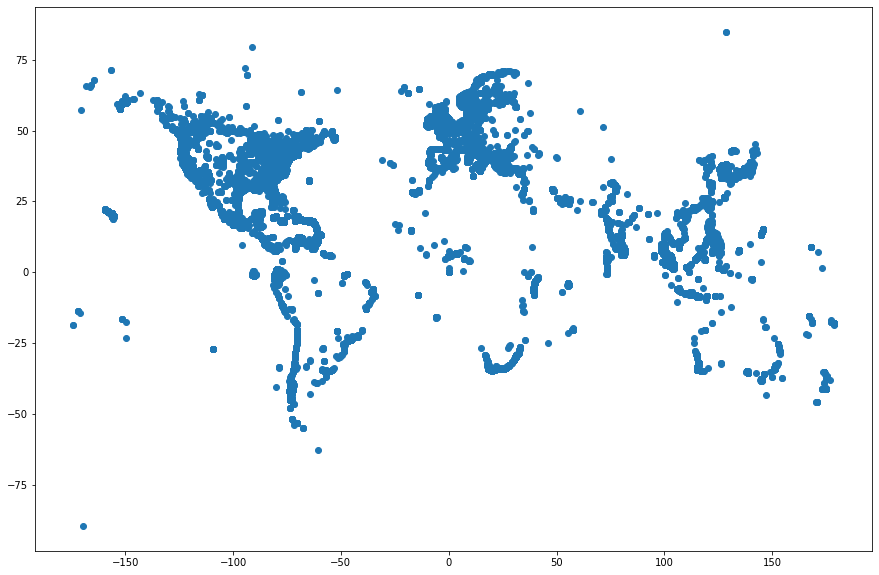

In [115]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.scatter(x=cleanups['longitude'], y=cleanups['latitude']);

First, let's make a function that runs $k$-means clustering for us.

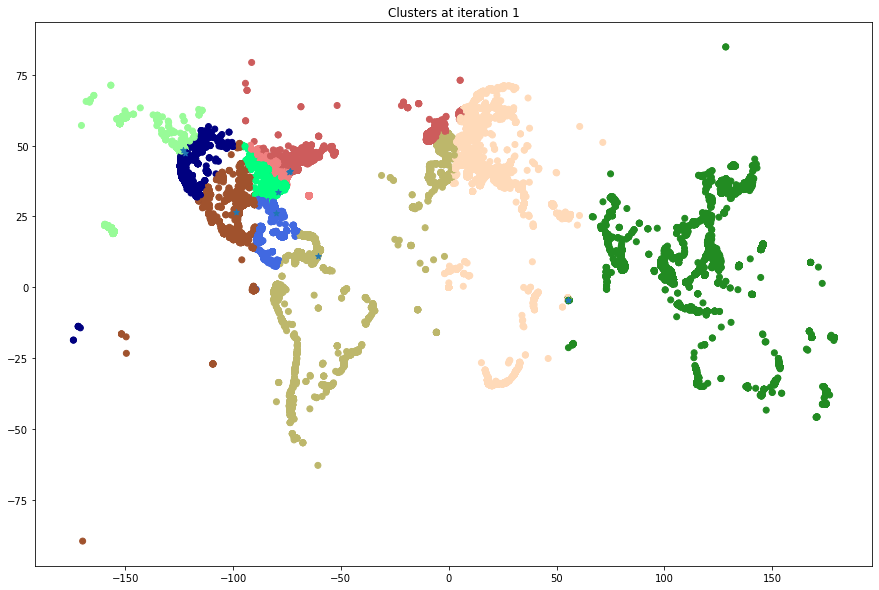

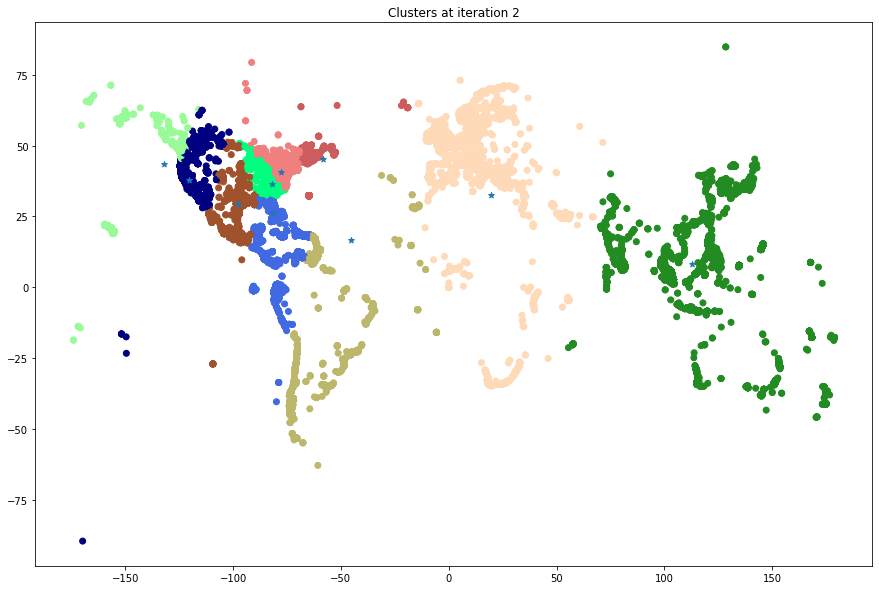

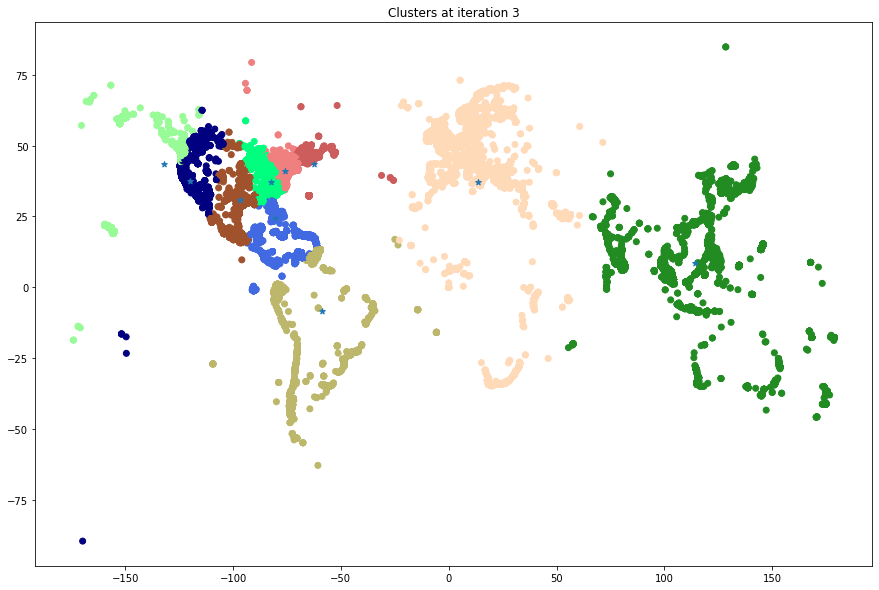

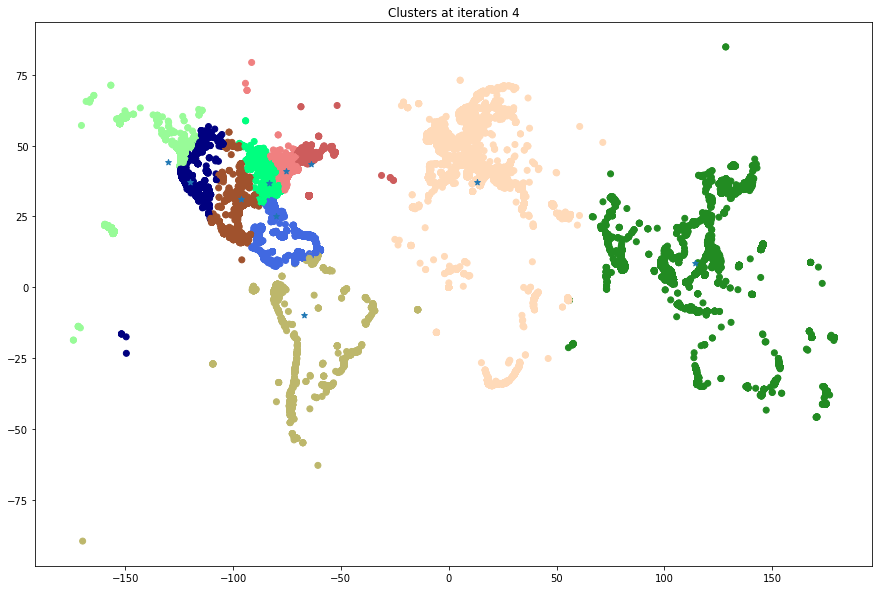

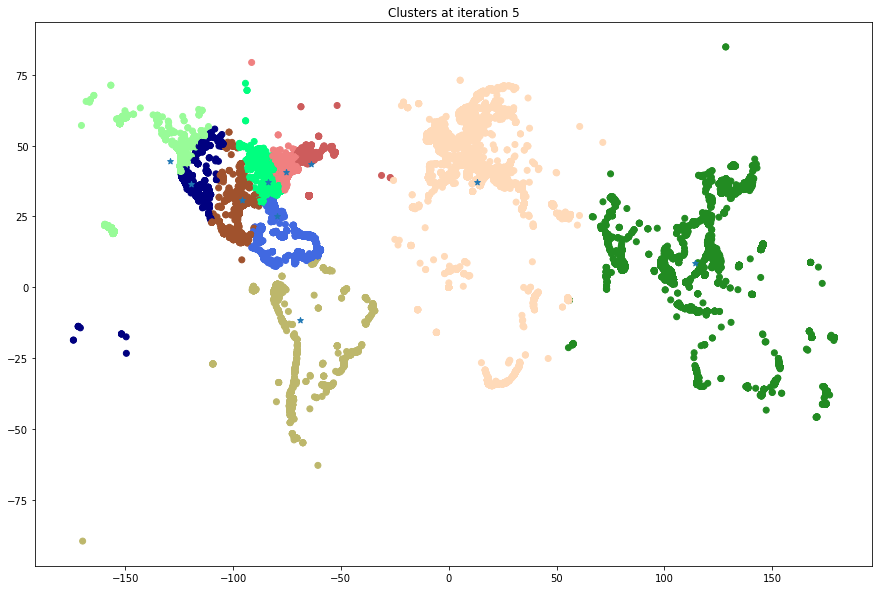

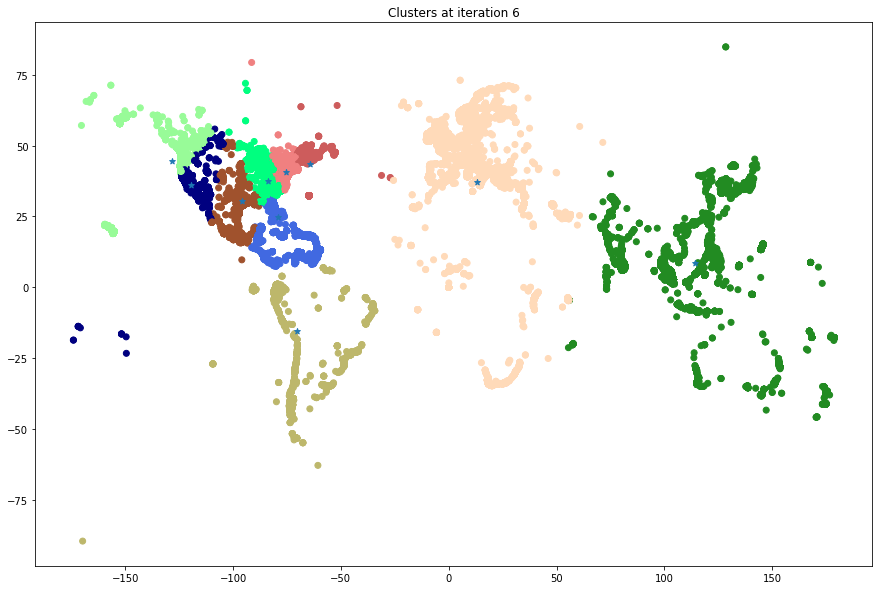

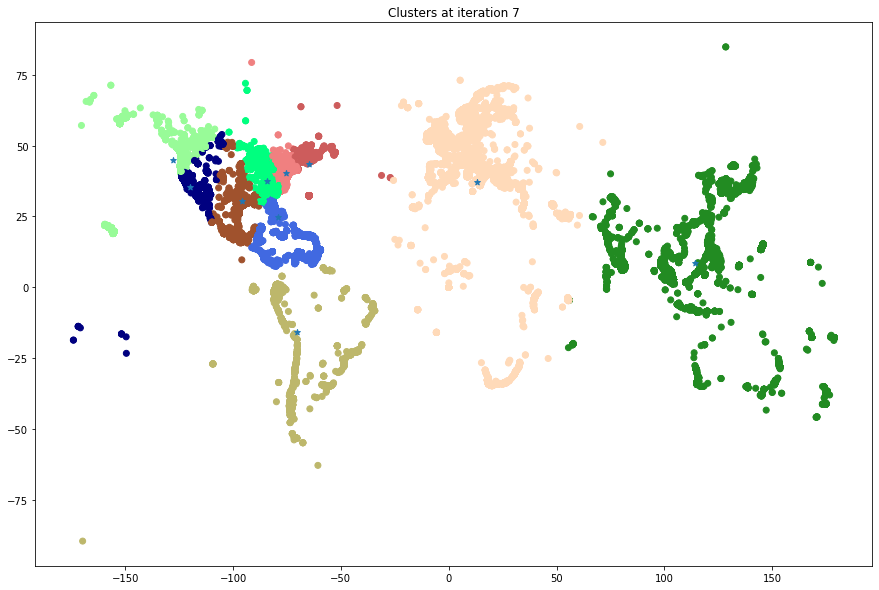

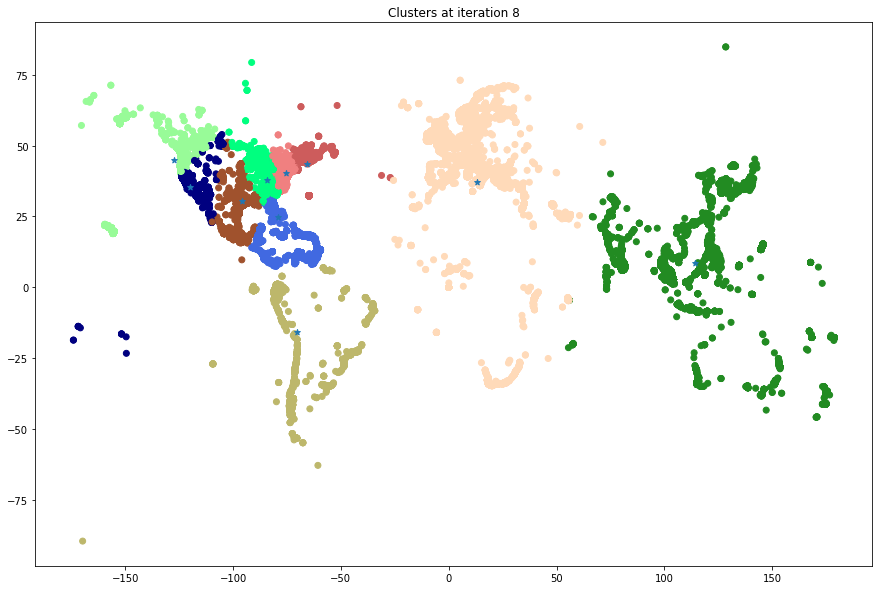

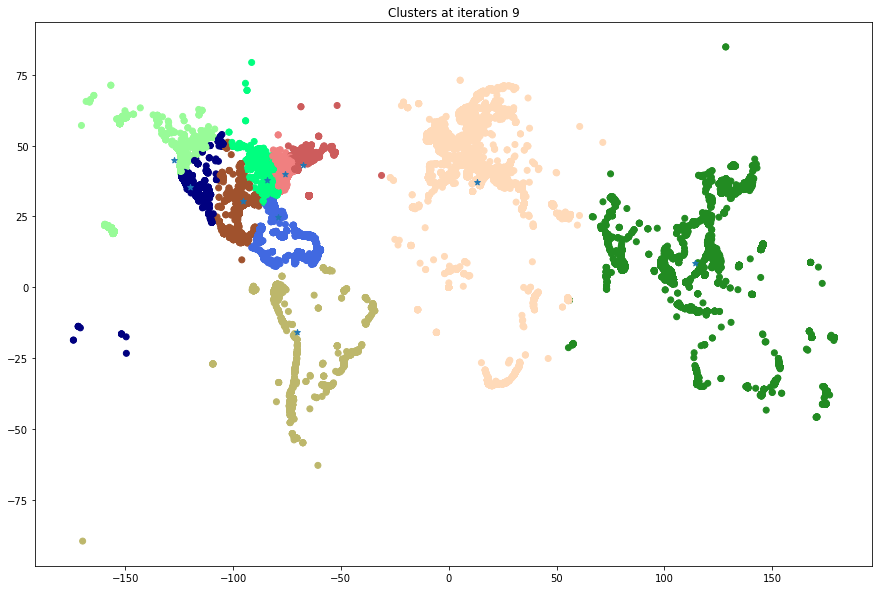

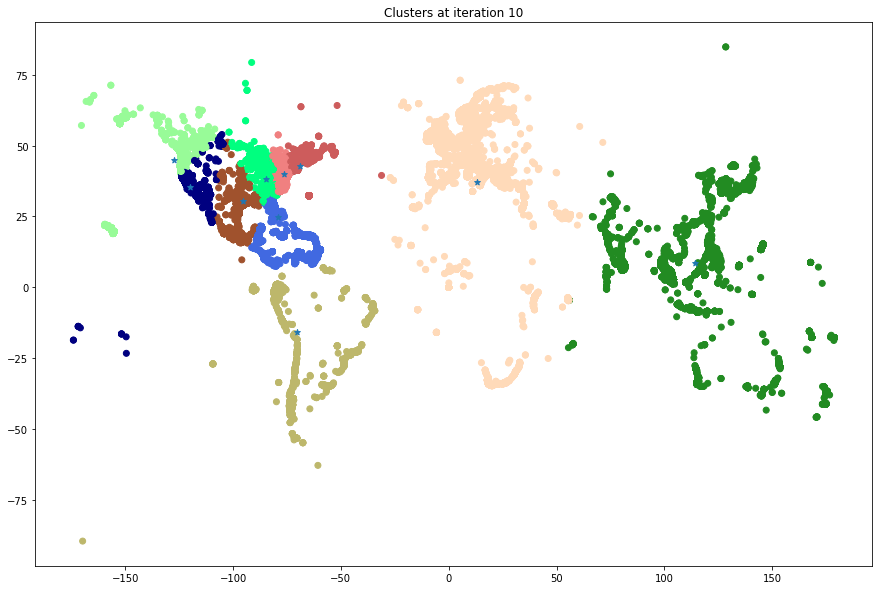

In [119]:
import numpy as np
import random
import math

def clustered(points: [(float,)], k: int) -> [int]:
    # step 1. randomly assign the centroids
    centroids = random.sample(points, k)
    
    # step 2. add each point to a cluster based on which centroid is nearest
    nearest = lambda point: min(centroids, key=lambda centroid: sum(abs(a-b) ** 2 for a, b in zip(centroid, point)))
    clusters = [centroids.index(nearest(point)) for point in points]
    
    color_of_cluster = dict(enumerate(random.sample(list(mcolors.CSS4_COLORS), k)))
    for i in range(10):
        plt.figure(figsize=(15, 10))
        plt.title('Clusters at iteration %i'%(i+1))
        plt.scatter(x=cleanups['longitude'], y=cleanups['latitude'], color=[color_of_cluster[c] for c in clusters])
        plt.scatter(x=[y for x, y in centroids], y=[x for x, y in centroids], marker='*')
        plt.show()
        
        # step 3. take the mean of each point in the cluster to make new centroids
        sum_of_locations = [(0,) * len(points[0])] * k
        for point, cluster in zip(points, clusters):
            sum_of_locations[cluster] = tuple(a+b for a, b in zip(point, sum_of_locations[cluster]))
        centroids = [tuple(a / clusters.count(c) for a in total) for c, total in enumerate(sum_of_locations)]

        # step 4. update the clusters
        clusters = [centroids.index(nearest(point)) for point in points]

    return clusters

k = 10
clusters = clustered(list(zip(cleanups['latitude'], cleanups['longitude'])), k)